 blue for train loss
 orange for validation loss


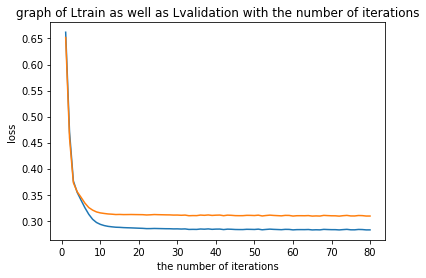

In [2]:
from sklearn.datasets import load_svmlight_file
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t_X,t_y=load_svmlight_file("/Users/hyx/Desktop/machinelearning/project1/australian.txt")
t_X=t_X.todense()  #转化为普通矩阵

t_X_column_num=t_X[0].size
t_X_row_num=int(t_X.size/t_X_column_num)

ones_column = ones((t_X_row_num,1)) 
t_X=hstack((ones_column,t_X))
t_X_column_num +=1  #矩阵加一列1

#将数据集切分为训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( t_X, t_y, test_size=0.33, random_state=3)


#w全零初始化
w = zeros((1,t_X_column_num))
w_temple=zeros((1,t_X_column_num))

eta = 0.0008125

train_size = y_train.size
test_size=y_test.size

#定义函数c()
def c(x,y,w):
    if(y*(w*x.T)<1):
        return -y
    return 0

#用于图显示
p_x = []
p_train_loss = []
p_validation_loss = []


for j in range(80):
    for i in range(train_size):
        w_temple=w_temple-(eta*(c(X_train[i],y_train[i],w_temple))*X_train[i])
    w=w_temple
    
    #计算train loss
    train_loss=0
    for lp in range(train_size):
        train_loss += float(max(0,1-y_train[lp]*(w*X_train[lp].T)))/train_size  
    p_x.append(j+1)
    p_train_loss.append(train_loss)
    
    #计算validation loss
    validation_loss=0
    for lp2 in range(test_size):
        validation_loss += float(max(0,1-y_test[lp2]*(w*X_test[lp2].T)))/test_size  
    p_validation_loss.append(validation_loss)
    
    
plt.plot(p_x, p_train_loss,label="train loss")
plt.plot(p_x, p_validation_loss,label="validation loss")
plt.title('graph of Ltrain as well as Lvalidation with the number of iterations')
plt.ylabel('loss')
plt.xlabel('the number of iterations')
print(' blue for train loss\n orange for validation loss')
# print('train loss:',p_train_loss)
# print('validation loss:',p_validation_loss)